### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Calculamos el ingreso total de cada una de las tiendas:

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

ingreso_total_1 = int(sum(tienda['Precio']))
ingreso_total_2 = int(sum(tienda2['Precio']))
ingreso_total_3 = int(sum(tienda3['Precio']))
ingreso_total_4 = int(sum(tienda4['Precio']))

# 2. Ventas por categoría

In [ ]:
2. Ventas por categoría

In [5]:
import matplotlib.pyplot as plt

def ventas_categoria(datos_tienda):
  conteo = datos_tienda.groupby('Categoría del Producto').size().reset_index(name='Total').sort_values(by='Total', ascending=False)
  plt.pie (conteo['Total'], labels = conteo['Categoría del Producto'])
  plt.show()
  return conteo

Ventas por categoria de tienda 1:


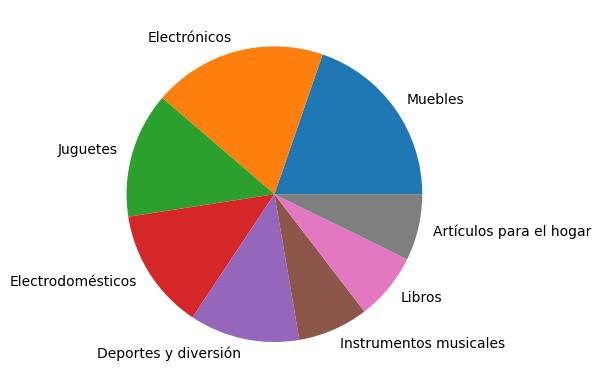

,Categoría del Producto,Total
7,Muebles,465
3,Electrónicos,448
5,Juguetes,324
2,Electrodomésticos,312
1,Deportes y diversión,284
4,Instrumentos musicales,182
6,Libros,173
0,Artículos para el hogar,171


In [7]:
print('Ventas por categoria de tienda 1:')
ventas_categoria(tienda)


# 3. Calificación promedio de la tienda


In [8]:
promedio_tienda1 = round(sum(tienda['Calificación'])/len(tienda['Calificación']),2)
promedio_tienda2 = round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)
promedio_tienda3 = round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
promedio_tienda4 = round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)
print(f'La calificación promedio de las tiendas es la siguiente:\nTienda 1: {promedio_tienda1}\nTienda 2: {promedio_tienda2}\nTienda 3: {promedio_tienda3}\nTienda 4: {promedio_tienda4}')

La calificación promedio de las tiendas es la siguiente:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


Tienda 1
El producto más vendido es: TV LED UHD 4K con 60 ventas.
El producto menos vendido es: Auriculares con micrófono con 33 ventas.

Tienda 2
El producto más vendido es: Iniciando en programación con 65 ventas.
El producto menos vendido es: Juego de mesa con 32 ventas.

Tienda 3
El producto más vendido es: Kit de bancas con 57 ventas.
El producto menos vendido es: Bloques de construcción con 35 ventas.

Tienda 4
El producto más vendido es: Cama box con 62 ventas.
El producto menos vendido es: Guitarra eléctrica con 33 ventas.


# 4. Productos más y menos vendidos

In [11]:
def ventas_producto(producto_tienda):
  #Definiendo los productos disponibles
  productos = producto_tienda['Producto']
  productos_unicos = list(set(productos))

  #Generando una lista de lista
  lista_productos=[]
  for producto in productos_unicos:
    lista=[i for i in productos if i == producto]
    lista_productos.append(lista)

  #Generando un diccionario con las ventas por producto
  ventas_por_producto = {productos_unicos[i]:len(lista_productos[i]) for i in range(len(productos_unicos))}

  #producto mas vendido y menos vendido
  producto_mas_vendido = max(ventas_por_producto, key=ventas_por_producto.get)
  ventas_maximas = ventas_por_producto[producto_mas_vendido]
  producto_menos_vendido = min(ventas_por_producto, key=ventas_por_producto.get)
  ventas_minimas = ventas_por_producto[producto_menos_vendido]
  print(f"El producto más vendido es: {producto_mas_vendido} con {ventas_maximas} ventas.")
  print(f"El producto menos vendido es: {producto_menos_vendido} con {ventas_minimas} ventas.")

print('Tienda 1')
ventas_producto(tienda)
print()
print('Tienda 2')
ventas_producto(tienda2)
print()
print('Tienda 3')
ventas_producto(tienda3)
print()
print('Tienda 4')
ventas_producto(tienda4)


Tienda 1
El producto más vendido es: TV LED UHD 4K con 60 ventas.
El producto menos vendido es: Auriculares con micrófono con 33 ventas.

Tienda 2
El producto más vendido es: Iniciando en programación con 65 ventas.
El producto menos vendido es: Juego de mesa con 32 ventas.

Tienda 3
El producto más vendido es: Kit de bancas con 57 ventas.
El producto menos vendido es: Bloques de construcción con 35 ventas.

Tienda 4
El producto más vendido es: Cama box con 62 ventas.
El producto menos vendido es: Guitarra eléctrica con 33 ventas.


In [12]:
def ventas_producto_graf(producto_tienda):
  #Definiendo los productos disponibles
  productos = producto_tienda['Producto']
  productos_unicos = list(set(productos))

  #Generando una lista de lista
  lista_productos=[]
  for producto in productos_unicos:
    lista=[i for i in productos if i == producto]
    lista_productos.append(lista)

  #Generando un diccionario con las ventas por producto
  ventas_por_producto = {productos_unicos[i]:len(lista_productos[i]) for i in range(len(productos_unicos))}
  orden_por_valor_desc = dict(sorted(ventas_por_producto.items(), key=lambda item: item[1], reverse=True))
  max_venta = next(iter(orden_por_valor_desc.items()))
  min_venta = next(reversed(orden_por_valor_desc.items()))
  df_max_min = pd.DataFrame((max_venta, min_venta), columns= ['Producto','Ventas'])
  plt.bar(df_max_min['Producto'], df_max_min['Ventas'], color=['b','r'])
  plt.show()
  return df_max_min

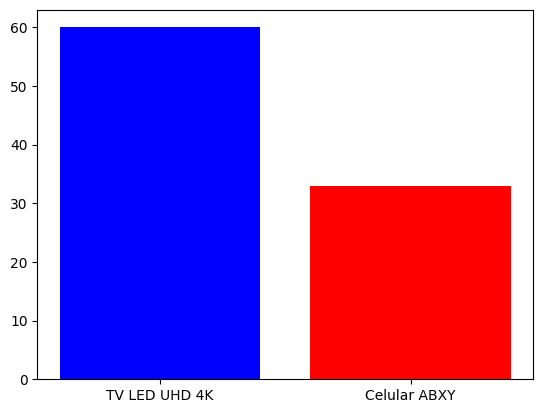

,Producto,Ventas
0,TV LED UHD 4K,60
1,Celular ABXY,33


In [13]:
ventas_producto_graf(tienda)

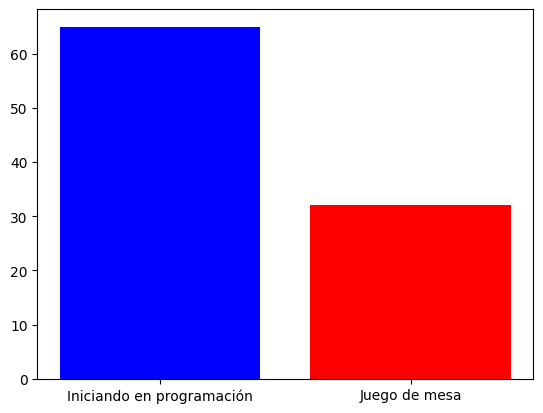

,Producto,Ventas
0,Iniciando en programación,65
1,Juego de mesa,32


In [14]:
ventas_producto_graf(tienda2)

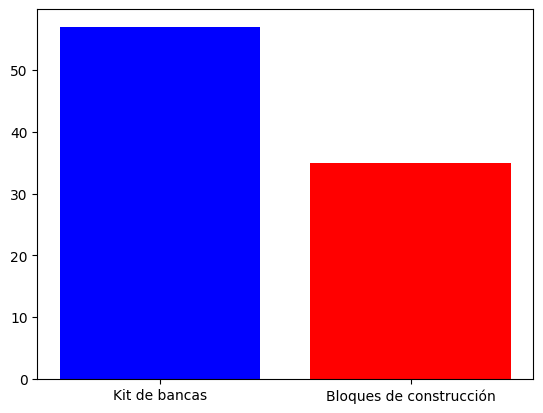

,Producto,Ventas
0,Kit de bancas,57
1,Bloques de construcción,35


In [15]:
ventas_producto_graf(tienda3)

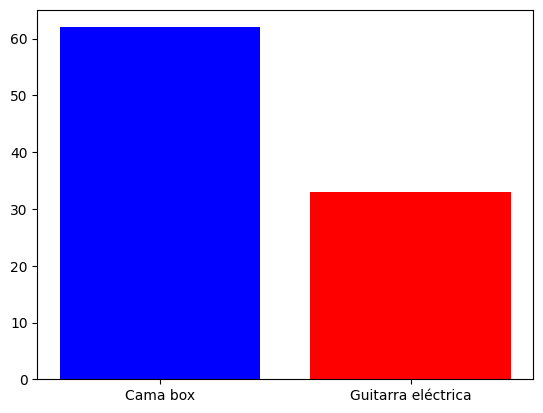

,Producto,Ventas
0,Cama box,62
1,Guitarra eléctrica,33


In [16]:
ventas_producto_graf(tienda4)

**Conclusión en base a Productos mas y menos vendidos**

El producto con más ventas en todas las tiendas es Iniciando en programación, mientras que el de menor demanda es Juego de mesa. Ambos se encuentran en la Tienda 2.

# 5. Envío promedio por tienda

In [17]:
promedio_envio_tienda1 = round(sum(tienda['Costo de envío'])/len(tienda['Costo de envío']),2)
promedio_envio_tienda2 = round(sum(tienda2['Costo de envío'])/len(tienda2['Costo de envío']),2)
promedio_envio_tienda3 = round(sum(tienda3['Costo de envío'])/len(tienda3['Costo de envío']),2)
promedio_envio_tienda4 = round(sum(tienda4['Costo de envío'])/len(tienda4['Costo de envío']),2)
print(f'El costo de envío promedio de las tiendas es la siguiente:\nTienda 1: {promedio_envio_tienda1}\nTienda 2: {promedio_envio_tienda2}\nTienda 3: {promedio_envio_tienda3}\nTienda 4: {promedio_envio_tienda4}')

El costo de envío promedio de las tiendas es la siguiente:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


Conclusión en base a Envío por tienda

La Tienda 1 es la que genera el mayor costo de envío, con un total de  26,018.61,mientrasquelaTienda4registraelmenorcosto,con 23,459.46.

**Conclusiones finales**

Las cuatro tiendas de Don Juan presentan un rendimiento bastante similar, lo cual dificulta la decisión de cuál cerrar. Sin embargo, con base en este análisis, hay ciertos escenarios que deben considerarse:

En cuanto a las ganancias generadas, Don Juan debería considerar cerrar la Tienda 4, ya que es la que reporta menores ingresos en comparación con las demás.

En cuanto a la valoración de las tiendas, la peor calificada es la Tienda 1, que paradójicamente es la que más ganancias genera. No obstante, su baja valoración, en comparación con el resto, podría afectar negativamente el prestigio general de la marca.

**En conclusión**, se recomienda cerrar la Tienda 4 por ser la menos rentable. Adicionalmente, se sugiere realizar un segundo análisis que permita identificar las causas de la baja valoración de la Tienda 1, con el objetivo de mejorar su percepción sin afectar sus altos ingresos.